In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\acer\Downloads\noshowappointments.csv")

In [3]:
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df1=df.copy()           # To maintain 

In [5]:
df1['ScheduledDay']=pd.to_datetime(df1['ScheduledDay'])    
                                                             # Convert Date Columns: Change ScheduledDay and AppointmentDay to datetime.
df1['AppointmentDay']=pd.to_datetime(df1['AppointmentDay'])

In [6]:
print(df1['Gender'].unique())                                # Making sure the uniqueness

['F' 'M']


In [7]:
print(df1['Neighbourhood'].unique()[:10])                    # Show only first 10 

['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO']


In [8]:
print(df1['No-show'].unique())                              # Checking uniqueness

['No' 'Yes']


In [9]:
df1['Gender'] = df1['Gender'].map({'F': 1, 'M': 0})            
                                                     # label encoding for better machine learning model  
df1['No-show']= df1['No-show'].map({'Yes':1,'No':0})

In [10]:
print(df['No-show'].value_counts(normalize=True))     #Early checking for model balanced evaluation

No-show
No     0.798067
Yes    0.201933
Name: proportion, dtype: float64


# Step 1: EXPLORATORY DATA ANALYSIS

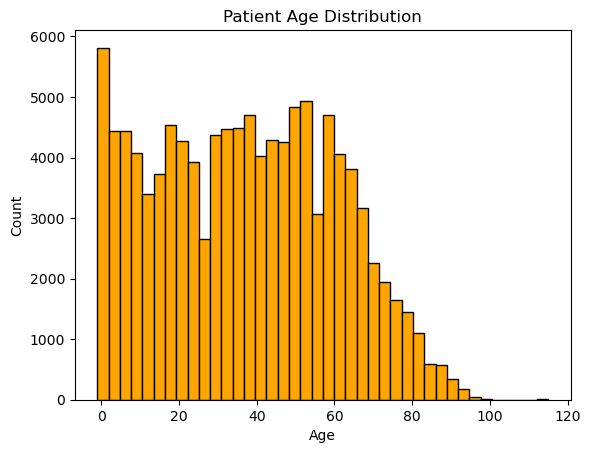

In [11]:
#Visualize Age Distribution

import matplotlib.pyplot as plt

plt.hist(df1['Age'], bins=40, color='orange', edgecolor='black' )
plt.title('Patient Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

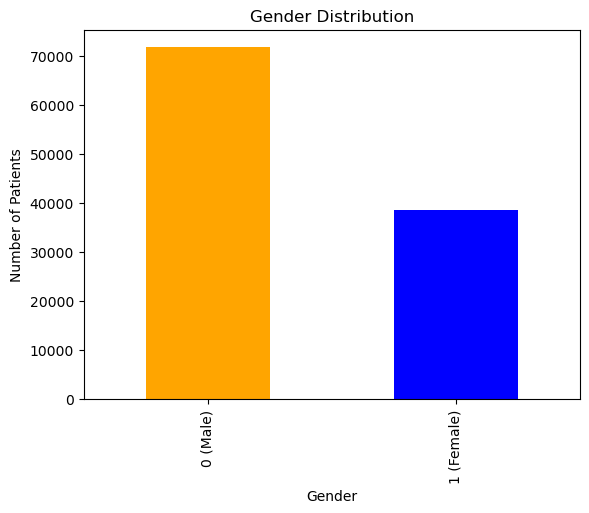

In [12]:
# Gender Breakdown

df1['Gender'].value_counts().plot(kind='bar', color=['orange','blue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['0 (Male)', '1 (Female)'])
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_7828\925199240.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='SMS_received', y='No-show', data=df1, ci=None)


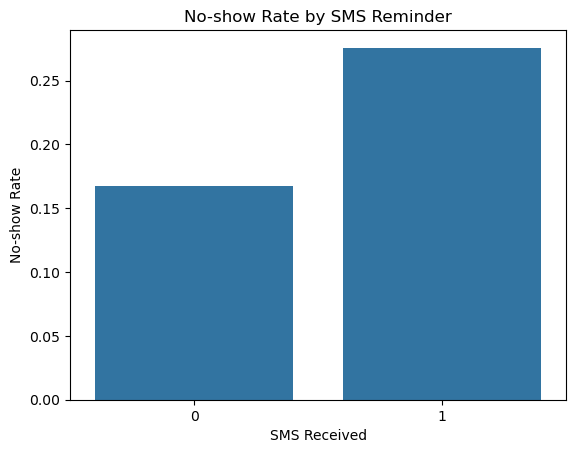

In [13]:
# No-show Rate by SMS Reminder

import seaborn as sns

sns.barplot(x='SMS_received', y='No-show', data=df1, ci=None)
plt.title('No-show Rate by SMS Reminder')
plt.xlabel('SMS Received')
plt.ylabel('No-show Rate')
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_7828\1606146520.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='AgeGroup', y='No-show', data=df1, ci=None)


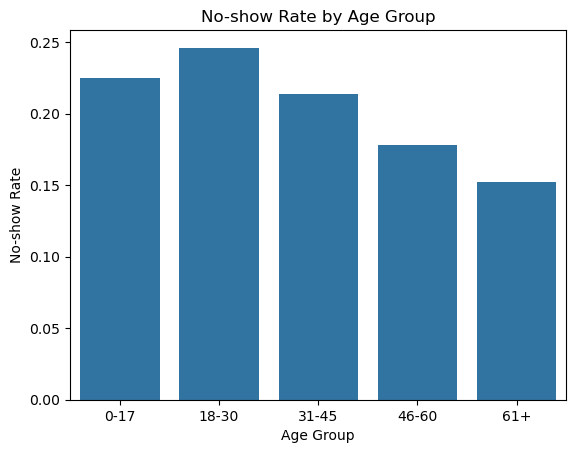

In [14]:
# No-show Rate by Age Group

df1['AgeGroup'] = pd.cut(df1['Age'], bins=[0,17,30,45,60,100], labels=['0-17','18-30','31-45','46-60','61+'])
sns.barplot(x='AgeGroup', y='No-show', data=df1, ci=None)
plt.title('No-show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('No-show Rate')
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_7828\2689770635.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Weekday', y='No-show', data=df1, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ci=None)


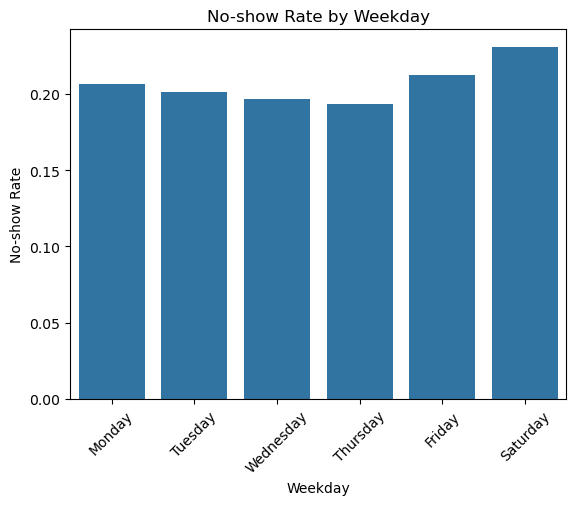

In [15]:
#No show rate by weekday

df1['Weekday'] = df1['AppointmentDay'].dt.day_name()
sns.barplot(x='Weekday', y='No-show', data=df1, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'], ci=None)
plt.title('No-show Rate by Weekday')
plt.xlabel('Weekday')
plt.ylabel('No-show Rate')
plt.xticks(rotation=45)
plt.show()


In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

# Step 2: Feature Engineering

In [16]:
df1['DaysToAppointment'] = (df1['AppointmentDay'] - df1['ScheduledDay']).dt.days    # Add time gap between scheduling and appointment


In [17]:
df1['SameDayBooking'] = (df1['DaysToAppointment'] == 0).astype(int) # Flag appointments booked for the same day

# Step 3: Prepare Features and Target

In [18]:
# Fill in the actual columns you want to use
features = ['Age', 'Gender', 'Scholarship', 'Hipertension', 'Diabetes', 
            'Alcoholism', 'Handcap', 'SMS_received', 'DaysToAppointment', 'SameDayBooking']
X = df1[features]
y = df1['No-show']


In [19]:
from sklearn.model_selection import train_test_split
                                                          #  Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


# Step 4: Model training/ Evaluation

In [20]:
from sklearn.tree import DecisionTreeClassifier                      #Decision tree model training

# Class weighting helps handle imbalance
model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score       # Predictions and model Evaluation

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.85      0.71      0.78     17642
           1       0.31      0.50      0.38      4464

    accuracy                           0.67     22106
   macro avg       0.58      0.61      0.58     22106
weighted avg       0.74      0.67      0.70     22106

Confusion Matrix:
 [[12579  5063]
 [ 2216  2248]]
ROC AUC: 0.5898219272678956


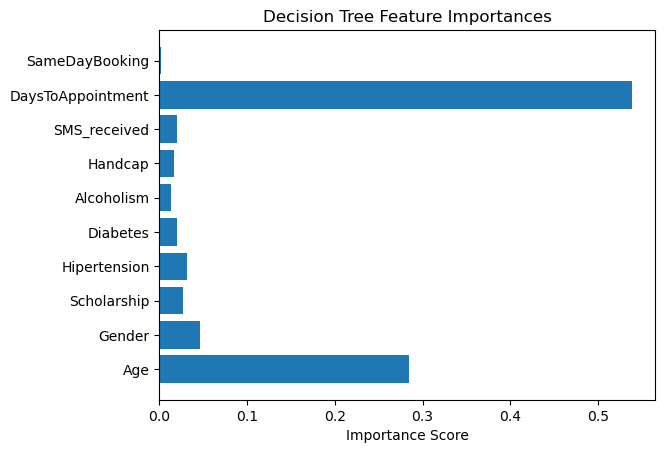

In [25]:
import matplotlib.pyplot as plt      # Feature Importance Visualization


importances = model.feature_importances_
features_list = X_train.columns
plt.barh(features_list, importances)
plt.title('Decision Tree Feature Importances')
plt.xlabel('Importance Score')
plt.show()


# Step 5: Model improvement using Ensemble techniques

# Random forest instead of normal decision tree

In [22]:
from sklearn.ensemble import RandomForestClassifier 

rf = RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

from sklearn.metrics import classification_report, roc_auc_score
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.84      0.77      0.80     17642
           1       0.31      0.42      0.36      4464

    accuracy                           0.70     22106
   macro avg       0.58      0.59      0.58     22106
weighted avg       0.73      0.70      0.71     22106

Confusion Matrix:
 [[13519  4123]
 [ 2586  1878]]
ROC AUC: 0.6385502643374255


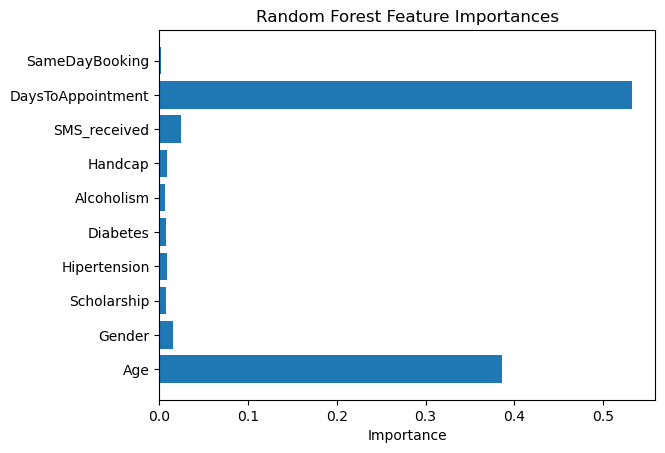

In [23]:
import matplotlib.pyplot as plt

importances_rf = rf.feature_importances_
plt.barh(X_train.columns, importances_rf)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.show()


# Gradient Boosting technique

In [24]:
from sklearn.ensemble import GradientBoostingClassifier    

gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print(classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("ROC AUC:", roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.50      0.00      0.01      4464

    accuracy                           0.80     22106
   macro avg       0.65      0.50      0.45     22106
weighted avg       0.74      0.80      0.71     22106

Confusion Matrix:
 [[17623    19]
 [ 4445    19]]
ROC AUC: 0.7306153443497291


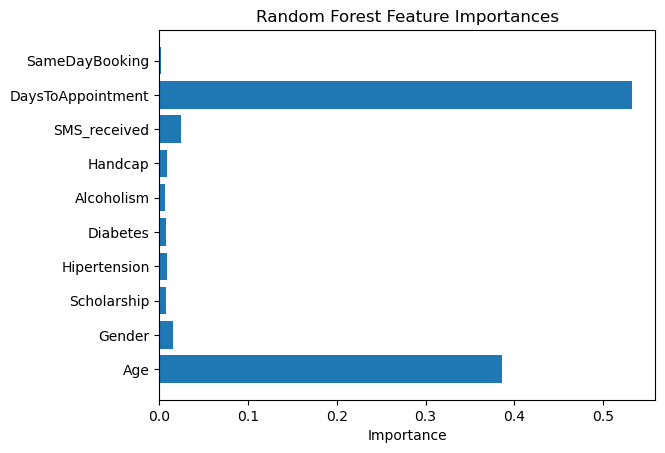

In [29]:
import matplotlib.pyplot as plt

importances_rf = rf.feature_importances_
plt.barh(X_train.columns, importances_rf)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.show()

In [28]:
from sklearn.metrics import roc_auc_score

gb_probs = gb.predict_proba(X_test)[:, 1]
gb_pred = (gb_probs >= 0.3).astype(int)

print(classification_report(y_test, gb_pred))
print(confusion_matrix(y_test, gb_pred))
print("ROC AUC Score:", roc_auc_score(y_test, gb_probs))


              precision    recall  f1-score   support

           0       0.86      0.79      0.82     17642
           1       0.36      0.48      0.41      4464

    accuracy                           0.72     22106
   macro avg       0.61      0.63      0.62     22106
weighted avg       0.76      0.72      0.74     22106

[[13887  3755]
 [ 2340  2124]]
ROC AUC Score: 0.7306153443497291


# Adjusting threshold for better results

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

thresholds = [0.05, 0.3, 0.5]
gb_probs = gb.predict_proba(X_test)[:, 1]

for t in thresholds:
    gb_pred = (gb_probs >= t).astype(int)
    print(f"\nThreshold: {t}")
    print(classification_report(y_test, gb_pred))
    print(confusion_matrix(y_test, gb_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, gb_probs))



Threshold: 0.05
              precision    recall  f1-score   support

           0       0.97      0.32      0.48     17642
           1       0.26      0.96      0.41      4464

    accuracy                           0.45     22106
   macro avg       0.62      0.64      0.45     22106
weighted avg       0.83      0.45      0.47     22106

[[ 5648 11994]
 [  172  4292]]
ROC AUC Score: 0.7306153443497291

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     17642
           1       0.36      0.48      0.41      4464

    accuracy                           0.72     22106
   macro avg       0.61      0.63      0.62     22106
weighted avg       0.76      0.72      0.74     22106

[[13887  3755]
 [ 2340  2124]]
ROC AUC Score: 0.7306153443497291

Threshold: 0.5
              precision    recall  f1-score   support

           0       0.80      1.00      0.89     17642
           1       0.50      0.00      0.01      4464

   

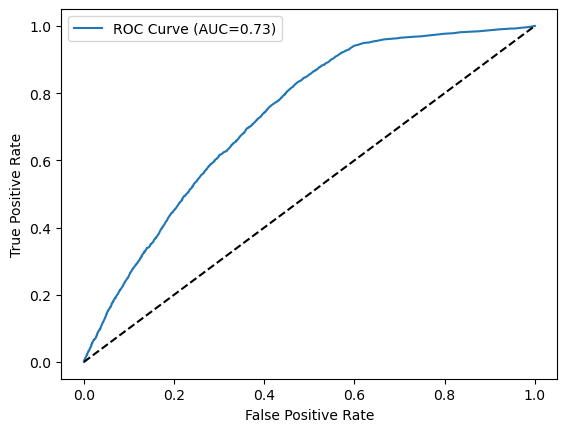

In [39]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, gb_probs)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC={roc_auc_score(y_test, gb_probs):.2f})')
plt.plot([0,1],[0,1],'k--')  # Reference curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [34]:
# Predict using probabilities + threshold
gb_probs = gb.predict_proba(X_test)[:, 1]
threshold = 0.3  # test several values
gb_pred_adjusted = (gb_probs >= threshold).astype(int)


# Step 6: Export Results for Dashboard/Reporting

In [32]:
export_df = X_test.copy()
export_df['Actual_NoShow'] = y_test.values
export_df['Predicted_NoShow'] = gb_pred_adjusted
export_df['NoShow_Prob'] = gb_probs
export_df.to_csv('no_show_dashboard_utf8.csv', index=False, encoding='utf-8')